In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Merging DataFrame

The dataset which I will use in this one is scattered in different files hence why I will be merging them together first

In [2]:
customer = pd.read_csv('Restaurant - Customers.csv').copy()
food = pd.read_csv('Restaurant - Foods.csv').copy()
sales1 = pd.read_csv('Restaurant - Week 1 Sales.csv').copy()
sales2 = pd.read_csv('Restaurant - Week 2 Sales.csv').copy()

In [3]:
customer

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant
...,...,...,...,...,...,...
995,996,Debra,Garcia,Female,Dazzlesphere,Structural Engineer
996,997,Douglas,Bishop,Male,Livepath,Developer I
997,998,Frank,Franklin,Male,Brainverse,Nurse Practicioner
998,999,Jessica,Burns,Female,Babbleblab,Financial Advisor


In [4]:
sales1

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,413,9
246,926,6
247,134,3
248,396,6


In [5]:
sales2

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


### Above as we can see in some columns of the DataFrame is the same or represent the same thing
### For example

    The "ID" column in "customer" DataFrame is representing the same thing as "ID" in "sales1" DataFrame
    And for "sales1" and "sales2" both have the same column but "sales1" is for week 1 and "sales2" is for week 2

In [6]:
# Make both "sales1" and "sales2" into same DataFrame as "sales"
sales = pd.concat(objs = [sales1, sales2],keys = ['Week 1', 'Week 2'])

In [7]:
sales

Customer ID  Food ID
Week 1 0            537        9
       1             97        4
       2            658        1
       3            202        2
       4            155        9
...                 ...      ...
Week 2 245          783       10
       246          556       10
       247          547        9
       248          252        9
       249          249        6

[500 rows x 2 columns]

In [8]:
# Merge "sales" and "customer" together so that we can know who order which "Food ID".
customer = sales.merge(right = customer, how = 'left', left_on = 'Customer ID', right_on = 'ID').drop(labels = 'ID', axis = 1)
# Above I use .drop() because "Customer ID" and "ID" is representing the same thing.
customer

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III
...,...,...,...,...,...,...,...
495,783,10,Phyllis,Meyer,Female,Voolia,Information Systems Manager
496,556,10,Samuel,Bailey,Male,Oyoloo,Nurse
497,547,9,Tina,Watkins,Female,Thoughtstorm,Accountant II
498,252,9,Douglas,Powell,Male,Jetwire,Geologist IV


In [9]:
food

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49
5,6,Pasta,13.99
6,7,Steak,24.99
7,8,Salad,11.25
8,9,Donut,0.99
9,10,Drink,1.75


In [10]:
# Now I merge "food" DataFrame with "customer" above so that I can know the name of "Food ID" and the "Price" that the customer order.
report = customer.merge(right = food, how  = 'left', on = 'Food ID')
report

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,Donut,0.99
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,Quesadilla,4.25
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,Sushi,3.99
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III,Burrito,9.99
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,Donut,0.99
...,...,...,...,...,...,...,...,...,...
495,783,10,Phyllis,Meyer,Female,Voolia,Information Systems Manager,Drink,1.75
496,556,10,Samuel,Bailey,Male,Oyoloo,Nurse,Drink,1.75
497,547,9,Tina,Watkins,Female,Thoughtstorm,Accountant II,Donut,0.99
498,252,9,Douglas,Powell,Male,Jetwire,Geologist IV,Donut,0.99


### Below is where I will rearange the order of the column so that "Food ID" and "Food Item" will be next together

In [11]:
cols = report.columns.tolist()
cols

['Customer ID',
 'Food ID',
 'First Name',
 'Last Name',
 'Gender',
 'Company',
 'Occupation',
 'Food Item',
 'Price']

In [12]:
target = cols[1:2]
target

['Food ID']

In [13]:
cols_new = cols[:1]+ cols[2:7] + target + cols[7:]
cols_new

['Customer ID',
 'First Name',
 'Last Name',
 'Gender',
 'Company',
 'Occupation',
 'Food ID',
 'Food Item',
 'Price']

In [14]:
report = report[cols_new]
report

,Customer ID,First Name,Last Name,Gender,Company,Occupation,Food ID,Food Item,Price
0,537,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,9,Donut,0.99
1,97,Amanda,Watkins,Female,Ozu,Account Coordinator,4,Quesadilla,4.25
2,658,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,1,Sushi,3.99
3,202,Louis,Campbell,Male,Rhynoodle,Account Representative III,2,Burrito,9.99
4,155,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,9,Donut,0.99
...,...,...,...,...,...,...,...,...,...
495,783,Phyllis,Meyer,Female,Voolia,Information Systems Manager,10,Drink,1.75
496,556,Samuel,Bailey,Male,Oyoloo,Nurse,10,Drink,1.75
497,547,Tina,Watkins,Female,Thoughtstorm,Accountant II,9,Donut,0.99
498,252,Douglas,Powell,Male,Jetwire,Geologist IV,9,Donut,0.99


### Find How many families comes eat

In [15]:
report['Last Name'].nunique()

198

In [16]:
report['Last Name'].unique()

array(['Carroll', 'Watkins', 'Webb', 'Campbell', 'Diaz', 'Foster',
       'Bailey', 'Daniels', 'Reyes', 'Miller', 'Richards', 'Ford',
       'Gutierrez', 'Jackson', 'Oliver', 'Perkins', 'Morales', 'Nelson',
       'Rivera', 'Carpenter', 'Kennedy', 'Hill', 'Dunn', 'Nguyen',
       'Mcdonald', 'Robinson', 'Rogers', 'Gordon', 'Rice', 'Chavez',
       'Adams', 'Lane', 'Edwards', 'Gardner', 'Hughes', 'White', 'Harris',
       'Brown', 'Matthews', 'Rodriguez', 'Thompson', 'James', 'Howard',
       'Garcia', 'Taylor', 'Lopez', 'Lawson', 'Fuller', 'Hawkins',
       'Ellis', 'Payne', 'Ortiz', 'Cruz', 'Black', 'Ferguson', 'Lewis',
       'Russell', 'Hicks', 'Jordan', 'Garza', 'Bowman', 'Cox', 'Willis',
       'Mccoy', 'Scott', 'Martin', 'Welch', 'Wilson', 'Stewart', 'Jones',
       'Owens', 'Dixon', 'Green', 'Hamilton', 'Stanley', 'Weaver',
       'Sullivan', 'Long', 'Burns', 'Reed', 'Kelly', 'Franklin',
       'Williamson', 'Kelley', 'Bryant', 'Mendoza', 'Olson', 'Johnson',
       'Mason', 'Rey

### In these 2 weeks there are 198 families using the service

## Find the number of times each items was sold

In [17]:
item_sales = report.groupby('Food Item')
item_sales.size()

Food Item
Burrito       57
Donut         55
Drink         59
Pasta         54
Pizza         39
Quesadilla    49
Salad         48
Steak         50
Sushi         43
Taco          46
dtype: int64

In [18]:
item_sales = item_sales.size().to_frame().rename(mapper = {0: 'Sale Times'}, axis = 1)
item_sales

,Sale Times
Food Item,
Burrito,57
Donut,55
Drink,59
Pasta,54
Pizza,39
Quesadilla,49
Salad,48
Steak,50
Sushi,43


In [19]:
reset = item_sales.reset_index()
reset

,Food Item,Sale Times
0,Burrito,57
1,Donut,55
2,Drink,59
3,Pasta,54
4,Pizza,39
5,Quesadilla,49
6,Salad,48
7,Steak,50
8,Sushi,43
9,Taco,46


### Plot pie chart using "Matplotlib" of number of times each items was sold

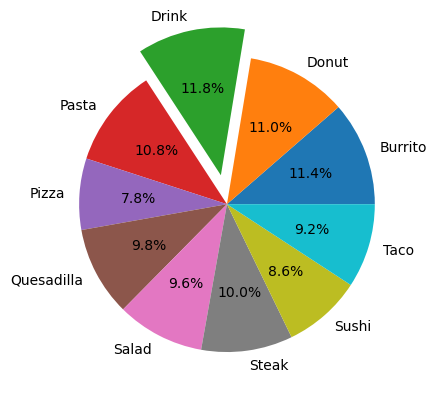

In [20]:
x = reset['Sale Times']

plt.pie(x, labels = reset['Food Item'],autopct = '%1.1f%%', explode = [0,0,0.2,0,0,0,0,0,0,0])
plt.show()

### Create new DataFrame to for number of times each items was sold

In [21]:
reset

,Food Item,Sale Times
0,Burrito,57
1,Donut,55
2,Drink,59
3,Pasta,54
4,Pizza,39
5,Quesadilla,49
6,Salad,48
7,Steak,50
8,Sushi,43
9,Taco,46


In [22]:
food

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49
5,6,Pasta,13.99
6,7,Steak,24.99
7,8,Salad,11.25
8,9,Donut,0.99
9,10,Drink,1.75


In [23]:
# Merging both DataFrame together on column "Food Item"
sold = food.merge(right = reset, how = 'left', on = 'Food Item')
sold

,Food ID,Food Item,Price,Sale Times
0,1,Sushi,3.99,43
1,2,Burrito,9.99,57
2,3,Taco,2.99,46
3,4,Quesadilla,4.25,49
4,5,Pizza,2.49,39
5,6,Pasta,13.99,54
6,7,Steak,24.99,50
7,8,Salad,11.25,48
8,9,Donut,0.99,55
9,10,Drink,1.75,59


In [24]:
# Create new column  which represent the total incomes from each Item.
sold['Income'] = sold['Price'] * sold['Sale Times']

In [25]:
sold

,Food ID,Food Item,Price,Sale Times,Income
0,1,Sushi,3.99,43,171.57
1,2,Burrito,9.99,57,569.43
2,3,Taco,2.99,46,137.54
3,4,Quesadilla,4.25,49,208.25
4,5,Pizza,2.49,39,97.11
5,6,Pasta,13.99,54,755.46
6,7,Steak,24.99,50,1249.50
7,8,Salad,11.25,48,540.00
8,9,Donut,0.99,55,54.45
9,10,Drink,1.75,59,103.25


# So in the end I have 2 new DataFrames 

**First** is the merge of all the scattered dataFrame

In [26]:
report

,Customer ID,First Name,Last Name,Gender,Company,Occupation,Food ID,Food Item,Price
0,537,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,9,Donut,0.99
1,97,Amanda,Watkins,Female,Ozu,Account Coordinator,4,Quesadilla,4.25
2,658,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,1,Sushi,3.99
3,202,Louis,Campbell,Male,Rhynoodle,Account Representative III,2,Burrito,9.99
4,155,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,9,Donut,0.99
...,...,...,...,...,...,...,...,...,...
495,783,Phyllis,Meyer,Female,Voolia,Information Systems Manager,10,Drink,1.75
496,556,Samuel,Bailey,Male,Oyoloo,Nurse,10,Drink,1.75
497,547,Tina,Watkins,Female,Thoughtstorm,Accountant II,9,Donut,0.99
498,252,Douglas,Powell,Male,Jetwire,Geologist IV,9,Donut,0.99


**Second** is the DataFrame represent how many times each items was sold and the total income of each one

In [27]:
sold

,Food ID,Food Item,Price,Sale Times,Income
0,1,Sushi,3.99,43,171.57
1,2,Burrito,9.99,57,569.43
2,3,Taco,2.99,46,137.54
3,4,Quesadilla,4.25,49,208.25
4,5,Pizza,2.49,39,97.11
5,6,Pasta,13.99,54,755.46
6,7,Steak,24.99,50,1249.50
7,8,Salad,11.25,48,540.00
8,9,Donut,0.99,55,54.45
9,10,Drink,1.75,59,103.25


In [28]:
with pd.ExcelWriter('Restaurant_report.xlsx') as excel:
    report.to_excel(excel, sheet_name  = 'Customer report', index = False)
    sold.to_excel(excel, sheet_name = 'Item sales', index = False)